# Data Wrangling

## Import libraries

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

## Load data


In [8]:
white_wine_path='./Data/winequality-white.csv'
red_wine_path='./Data/winequality-red.csv'

In [36]:
w_df=pd.read_csv(white_wine_path, sep=';')
r_df=pd.read_csv(red_wine_path, sep=';')

In [37]:
w_df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [38]:
w_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [39]:
r_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [40]:
r_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


No missing values in either data set. 

## Exploratory data analysis

Lets start with looking at the white wine data. The units for each of the features is contained in Table 1 [Cortez et al., 2009] below. dm<sup>3</sup> represents cubic decimetres and is equivalent to 1 litre.

![title](Data/wine_feature_units_table_1.png)

Our data is all numerical so we can look at their distributions:

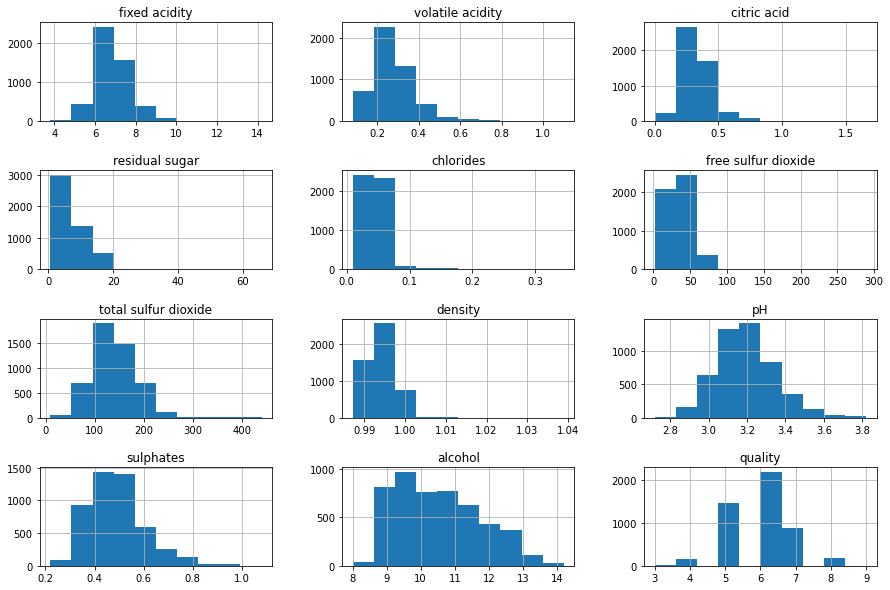

In [43]:
w_df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

Using domain knowledge, we know that pH is on a scale from 0-14. There seems to be no outliers or obvious errors in pH. The features residual sugar, chlorides, free sulfur dioxide, and density look like there could be outliers present.

**Residual sugar**

It seems only 3 rows have residual sugar above 30 g/L with the average being 6.3 g/L. Two of the rows are exact duplicates of each other.

In [52]:
w_df['residual sugar'].mean()

6.391414863209486

In [57]:
w_df[w_df['residual sugar'] > 30].sort_values(by='residual sugar', ascending=False)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2781,7.8,0.965,0.60,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6
1653,7.9,0.330,0.28,31.6,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
1663,7.9,0.330,0.28,31.6,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6


**Chlorides**

In [ ]:
Cholrides also show some heavy outliers

In [54]:
w_df['chlorides'].mean()

0.0457723560636995

In [59]:
w_df[w_df['chlorides'] > .25].sort_values(by='chlorides', ascending=False)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
484,6.2,0.37,0.30,6.6,0.346,79.0,200.0,0.99540,3.29,0.58,9.6,5
1217,8.0,0.61,0.38,12.1,0.301,24.0,220.0,0.99930,2.94,0.48,9.2,5
687,6.8,0.67,0.30,13.0,0.290,22.0,193.0,0.99840,3.08,0.67,9.0,4
4473,7.1,0.36,0.20,1.6,0.271,24.0,140.0,0.99356,3.11,0.63,9.8,5
1865,7.6,0.36,0.44,8.3,0.255,28.0,142.0,0.99580,3.12,0.43,10.2,6


**Free sulfur dioxide**

In [60]:
w_df['free sulfur dioxide'].mean()

35.30808493262556

In [62]:
w_df[w_df['free sulfur dioxide'] > 125].sort_values(by='free sulfur dioxide', ascending=False)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4745,6.1,0.260,0.25,2.9,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3
1931,7.1,0.490,0.22,2.0,0.047,146.5,307.5,0.99240,3.24,0.37,11.0,3
3050,6.2,0.255,0.24,1.7,0.039,138.5,272.0,0.99452,3.53,0.53,9.6,4
325,7.5,0.270,0.31,5.8,0.057,131.0,313.0,0.99460,3.18,0.59,10.5,5
2334,7.5,0.230,0.35,17.8,0.058,128.0,212.0,1.00241,3.44,0.43,8.9,5


From some quick research, it seems like total sulfur dioxide is the sum of free sulfur dioxide and bound sulfur dioxide. We should check for rows where there is more free sulfur dioxide than total sulfur dioxide. When modeling, we should consider use of only one of these features as multi collinearity issue may arise otherwise.

In [68]:
w_df[w_df['total sulfur dioxide'].sub(w_df['free sulfur dioxide'])<0]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


There doesn't seem to be any obvious errors. Let check how related these two features are

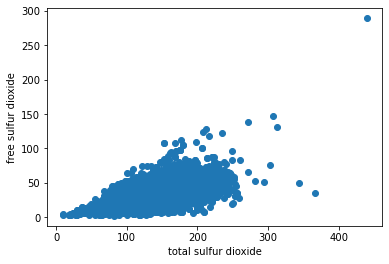

In [70]:
plt.scatter(w_df['total sulfur dioxide'],w_df['free sulfur dioxide'])
plt.xlabel('total sulfur dioxide')
plt.ylabel('free sulfur dioxide')
plt.show()

**Density**

Here the density of all the wines is very close to 1 g/cm<sup>3</sup> which is the density of water. There exists only 3 outliers with densities above 1.01 and again we see that 2 of the 3 rows are duplicates of each other. These 3 rows are also the 3 rows that showed up as outliers in the residual sugars column

In [73]:
w_df.density.mean()

0.9940273764801896

In [72]:
w_df[w_df['density'] > 1.01].sort_values(by='density', ascending=False)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2781,7.8,0.965,0.60,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6
1653,7.9,0.330,0.28,31.6,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
1663,7.9,0.330,0.28,31.6,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6


Lets drop these outliers from our dataset

In [76]:

w_df.drop(labels=[2781,1653,1663], axis=0, inplace=True)


KeyError: '[2781, 1653, 1663] not found in axis'

In [29]:
w_df[w_df.duplicated(keep='first')]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
20,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.800000,8
...,...,...,...,...,...,...,...,...,...,...,...,...
4828,6.4,0.23,0.35,10.3,0.042,54.0,140.0,0.99670,3.23,0.47,9.200000,5
4850,7.0,0.36,0.35,2.5,0.048,67.0,161.0,0.99146,3.05,0.56,11.100000,6
4851,6.4,0.33,0.44,8.9,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000,5
4856,7.1,0.23,0.39,13.7,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6


In [35]:
w_df.groupby(w_df.columns.tolist(),as_index=False).size().sort_values(by='size', ascending=False).head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,size
2389,7.0,0.15,0.28,14.7,0.051,29.0,149.0,0.99792,2.96,0.39,9.0,7,8
2881,7.3,0.19,0.27,13.9,0.057,45.0,155.0,0.99807,2.94,0.41,8.8,8,8
3000,7.4,0.16,0.30,13.7,0.056,33.0,168.0,0.99825,2.90,0.44,8.7,7,7
1973,6.8,0.18,0.30,12.8,0.062,19.0,171.0,0.99808,3.00,0.52,9.0,7,7
3019,7.4,0.19,0.30,12.8,0.053,48.5,229.0,0.99860,3.14,0.49,9.1,7,6
3255,7.6,0.20,0.30,14.2,0.056,53.0,212.5,0.99900,3.14,0.46,8.9,8,6
2998,7.4,0.16,0.27,15.5,0.050,25.0,135.0,0.99840,2.90,0.43,8.7,7,6
3020,7.4,0.19,0.31,14.5,0.045,39.0,193.0,0.99860,3.10,0.50,9.2,6,6
252,5.7,0.22,0.20,16.0,0.044,41.0,113.0,0.99862,3.22,0.46,8.9,6,5
3105,7.4,0.33,0.26,15.6,0.049,67.0,210.0,0.99907,3.06,0.68,9.5,5,5
